In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.facecolor'] = 'white'  # 设置全局图形背景颜色为白色
plt.rcParams['axes.facecolor'] = 'white'    # 设置全局绘图区背景颜色为白色

In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:
datajh['place']='JH'
datacm['place']='CM'

In [4]:

from sklearn.preprocessing import MinMaxScaler
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.barycenters import softdtw_barycenter
transfer = MinMaxScaler(feature_range=(0, 1))
from kneed import KneeLocator

In [5]:
VOCs = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol', 'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane', 'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene', 'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane']

In [6]:
columns_to_keep = ['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度',
                   '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度', '二甲基甲酰胺浓度', '甲酸乙酯浓度',
                   '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度',
                   '乙硫醚、丁硫醇浓度',
                   '甲苯浓度', '苯胺浓度', '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度',
                   '三乙胺浓度',
                   '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度', '1,3-二氯丙烯浓度',
                   '正辛烷浓度',
                   '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度',
                   '磷酸三甲酯浓度',
                   '正癸醇浓度', '二氯苯浓度', '二乙基苯胺浓度', '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度',
                   '二溴甲烷浓度',
                   '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度', 'Hour_Min','Time','place']

# Keep only the specified columns and merge the data
data = pd.concat([datajh[columns_to_keep], datacm[columns_to_keep]], axis=0)
data.columns = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol', 'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane', 'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene', 'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', 'Hour_Min','Time','place']


In [7]:
data=data.groupby(['Hour_Min']).mean(numeric_only=True).reset_index()

In [8]:
# 提取小时信息
data['Hour'] = data['Hour_Min'].apply(lambda x: int(x.split(':')[0]))

In [9]:
# data=data.groupby(['Hour']).mean().reset_index()

In [10]:
data

,Hour_Min,Methyl Mercaptan,"1,3-Butadiene",Butene,Acetone/Butane,n-Propanol,Dimethyl Sulfide/Ethyl Mercaptan,Chloroethane,Isoprene,Pentene,...,Dichlorobenzene,Diethyl Aniline,Undecane,Tetrachloroethylene,n-Dodecane,Dibromomethane,"1,2,4-Trichlorobenzene",n-Tridecane,"1,2-Dibromoethane",Hour
0,00:00,0.442646,0.877033,0.226024,1.092259,0.410013,0.925169,0.316314,1.584722,1.036250,...,0.454865,0.432231,0.434896,0.688171,0.743234,0.368693,0.407103,1.695045,0.500168,0
1,00:01,0.552736,0.819678,0.340996,1.110707,0.405821,0.746961,0.372368,1.346797,0.943438,...,0.383021,0.387326,0.779030,0.684826,0.448564,0.631030,0.358556,1.676290,0.460754,0
2,00:02,0.466232,0.847222,0.178610,1.040256,0.480737,0.772965,0.297294,1.016250,1.155556,...,0.378840,0.449650,0.358025,0.705790,0.363158,0.425311,0.481060,1.444539,0.551629,0
3,00:03,0.485987,0.626181,0.406269,1.127184,0.371658,1.083551,0.286817,1.097014,1.162847,...,0.450625,0.574343,0.423441,0.744563,0.804198,0.400324,0.700372,1.574800,0.422896,0
4,00:04,0.323678,0.746808,0.234958,1.077607,0.457408,0.845203,0.247602,1.511632,1.047187,...,0.320439,0.405209,0.426056,0.481356,0.557848,0.440328,0.356867,1.484616,0.665300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55,0.434617,0.850252,0.230766,0.975868,0.497952,1.055315,0.286715,1.656181,0.723125,...,0.356363,0.441796,0.333640,0.572239,0.568888,0.463095,0.523554,1.546292,0.541077,23
1436,23:56,0.490544,0.842509,0.246087,0.878170,0.374019,0.918783,0.300139,1.215139,1.059861,...,0.485646,0.461247,0.649531,0.582463,0.452180,0.348221,0.277856,1.484975,0.595956,23
1437,23:57,0.397974,0.837812,0.210011,1.144306,0.477570,1.057275,0.289839,1.198203,0.644219,...,0.382535,0.355274,0.405652,0.479107,0.401543,0.332187,0.478043,1.594350,0.448071,23
1438,23:58,0.457176,0.889086,0.276597,0.968874,0.470444,0.866762,0.299067,1.094167,1.328889,...,0.378473,0.430091,1.025392,0.653720,0.631399,0.471060,0.454933,1.629854,0.656308,23


In [11]:
from scipy.interpolate import interp1d
def transform_to_same_length(x,  max_length):
    n = x.shape[0]
    # x的形状(n,var,length)

    # the new set in ucr form np array
    ucr_x = np.zeros((n, max_length, 1), dtype=np.float64)


    mts = x
    curr_length = n
    idx = np.array(range(curr_length))
    idx_new = np.linspace(0, idx.max(), max_length)
    # linear interpolation
    f = interp1d(idx, mts, kind='cubic')
    new_ts = f(idx_new)

    return new_ts

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataclu=[]
for i in VOCs:
    dataclu.append(transform_to_same_length(data[i].values,250))
# 对 dataclu 中的每个时间序列进行归一化
normalized_dataclu = []
for series in dataclu:
    # series 的形状是 (250, 1)，需要进行归一化
    normalized_series = scaler.fit_transform(series.reshape(-1, 1))
    normalized_dataclu.append(normalized_series)
dataclu=normalized_dataclu

In [24]:
from tqdm import tqdm
inertias = []
max_clusters = 10  # 尝试最多10个簇
# 使用 tqdm 包装 range 以显示进度条
for n_clusters in tqdm(range(1, max_clusters + 1), desc="Clustering Progress"):
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, n_init=5, max_iter=100, metric="dtw", n_jobs=-1)
    kmeans.fit(dataclu)
    inertias.append(kmeans.inertia_)

Clustering Progress: 100%|██████████| 10/10 [01:07<00:00,  6.78s/it]


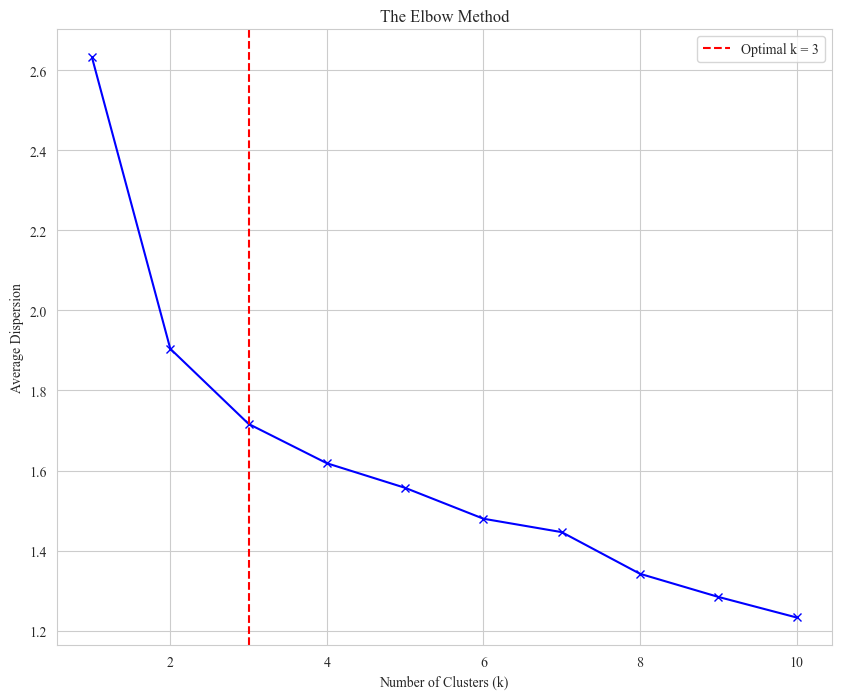

Optimal number of clusters: 3


In [25]:
# 使用 Kneedle 算法检测肘点
kneedle = KneeLocator(range(1, max_clusters+ 1), inertias, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# 绘制肘部图并标注最佳聚类数
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_clusters+ 1), inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Dispersion')
plt.title('The Elbow Method')
if optimal_k is not None:
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.legend()
plt.show()

print(f'Optimal number of clusters: {optimal_k}')

In [11]:
kmeans = TimeSeriesKMeans(n_clusters=3, n_init=50, max_iter=1000, metric="dtw", n_jobs=-1,random_state=132)
kmeans.fit(dataclu)

TimeSeriesKMeans(max_iter=1000, metric='dtw', n_init=50, n_jobs=-1,
                 random_state=132)

In [13]:
import joblib
# joblib.dump(kmeans, 'kmeans.joblib')
kmeans=joblib.load('kmeans.joblib')

In [14]:
# 找到所有标签为 2 的索引
indices = np.where(kmeans.labels_ == 1)[0]

# 使用这些索引从 VOCs 列表中获取对应的 VOC 名称
matched_vocs = [VOCs[i] for i in indices]

print(f"标签为 2 的 VOC 是: {matched_vocs}")

标签为 2 的 VOC 是: ['1,3-Butadiene', 'Butene', 'Acetone/Butane', 'Isoprene', 'Pentane/Isopentane', 'Dimethylformamide', 'Cyclohexene', 'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Toluene', 'Aniline', 'Methylcyclohexane', 'n-Heptane', 'Hexyl Mercaptan', 'Diethylbenzene', 'Methyl Benzoate']


In [15]:
motifs=dataclu
model=kmeans
nclu=3
import matplotlib.lines as mlines
from palettable.tableau import Tableau_20
from palettable.tableau import PurpleGray_12
from adjustText import adjust_text
import matplotlib.patheffects as path_effects
from matplotlib.patches import ConnectionPatch

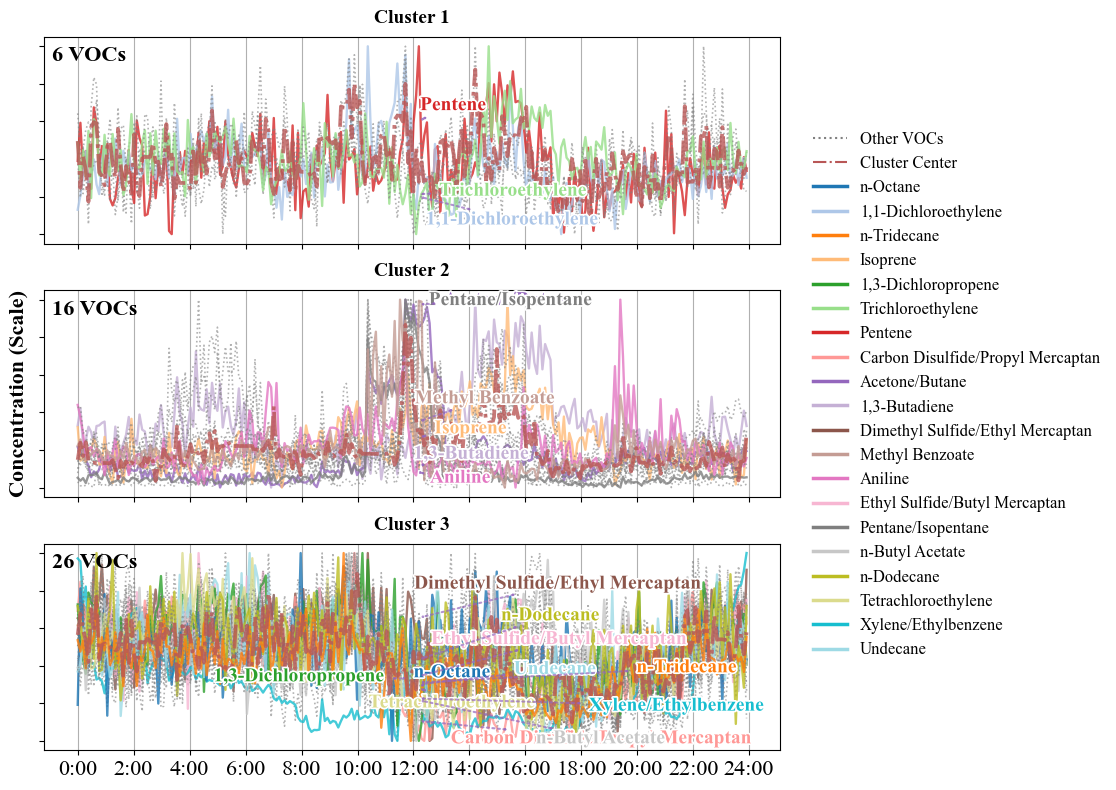

In [22]:
# 计算每个 VOC 的浓度均值，并获取排名前15的 VOCs
mean_concentrations = {voc: np.mean(data[voc]) for voc in VOCs}
top_15_vocs = sorted(mean_concentrations, key=mean_concentrations.get, reverse=True)[:20]

# 获取 Tableau_20 调色板
colors = Tableau_20.mpl_colors
# 创建子图
fig, ax = plt.subplots(nclu, 1, sharex=True, figsize=(8, 8))
fig.subplots_adjust(hspace=0.3)  # 调整子图之间的间距

# 计算每个聚类中的 VOCs 数量
vocs_count_by_cluster = [sum(1 for label in model.labels_ if label == yi) for yi in range(nclu)]
texts_by_ax = [[] for _ in range(nclu)]  # 创建一个列表来存储每个 ax 的文本对象
# 绘制每个 motif，逐个子图进行调整
for yi in range(nclu):
    for idx, (motif, label) in enumerate(zip(motifs, model.labels_)):
        if label == yi:  # 仅绘制当前子图的曲线
            if VOCs[idx] in top_15_vocs:
                # 使用对应的颜色和加粗线条绘制
                color_idx = top_15_vocs.index(VOCs[idx]) % len(colors)
                ax[yi].plot(motif, alpha=0.8, lw=1.7, c=colors[color_idx], label=VOCs[idx])

                # 添加箭头和文本标注
                x_position = len(motif) // 2  # 在曲线的中间位置添加标注
                y_position = motif[x_position]  # 获取曲线中间点的 y 值
                text = ax[yi].text(x_position, y_position, VOCs[idx], fontsize=14, color=colors[color_idx], fontweight='bold')
                text.set_path_effects([path_effects.Stroke(linewidth=2.5, foreground='white'), path_effects.Normal()])
                texts_by_ax[yi].append(text)  # 将文本对象保存到对应的 ax 的列表中
            else:
                # 默认使用灰色和较细的线条绘制
                ax[yi].plot(motif, alpha=0.6, lw=1.2, c="gray", linestyle=":")
    
    
     # 添加每个聚类的 VOCs 数量注释
    ax[yi].text(0.01, 0.95, f"{vocs_count_by_cluster[yi]} VOCs", transform=ax[yi].transAxes,
                fontsize=16, fontweight='bold', color='black', ha='left', va='top')

    adjust_text(
        texts_by_ax[yi],

        arrowprops=dict(
            arrowstyle='<|-|>',  
            color='#9467bd',  
            lw=1.5,  # 增加线条宽度
            alpha=0.7,  
            shrinkA=5, 
            shrinkB=5,  
        ),
        ax=ax[yi],
        zorder=3,  
        linestyle=':', 
)


# 绘制聚类中心
for i, center in enumerate(model.cluster_centers_):
    ax[i].set_title(f"Cluster {i+1}", fontsize=14, fontweight='bold', pad=10)
    ax[i].plot(center.ravel(), c="#B95756", alpha=0.8, lw=2.7, label="Cluster Center", linestyle='dashdot')

    # 删除 Y 轴标签
    ax[i].set_yticklabels([])

    # 仅在中间的图上标注 Y 轴标签
    if i == 1:
        ax[i].set_ylabel("Concentration (Scale)", fontsize=16, fontweight='bold')

    # 去除所有网格线
    ax[i].grid(axis='x')



# 设置 X 轴刻度为 24 小时分布的间隔，每 2 小时
hours = np.linspace(0, 24, 13)
ax[-1].set_xticks(np.linspace(0, 250, len(hours)))
ax[-1].set_xticklabels([f"{int(hour)}:00" for hour in hours], fontsize=16)

# 创建图例并将其放在右侧外部
gray_line = mlines.Line2D([], [], color='gray', label='Other VOCs', linestyle=':')
red_line = mlines.Line2D([], [], color='#B95756', label='Cluster Center', linestyle='dashdot')
handles = [gray_line, red_line] + [mlines.Line2D([], [], color=colors[top_15_vocs.index(voc) % len(colors)], lw=2.5, label=voc) for voc in top_15_vocs]
fig.legend(handles=handles, frameon=False, loc="center right", fontsize=12, bbox_to_anchor=(1.4, 0.5),ncol=1)

# # # 优化布局
plt.tight_layout()
plt.savefig("共变关系.svg", bbox_inches='tight')

plt.show()

In [ ]:
# # 创建子图
# fig, ax = plt.subplots(nclu, 1, sharex=True, figsize=(10, 10))
# fig.subplots_adjust(hspace=0.3)  # 调整子图之间的间距
# 
# # 绘制每个 motif
# for motif, label in zip(motifs, model.labels_):
#     ax[label].plot(motif, alpha=0.6, lw=1.2, c="gray", linestyle='--')
# 
# # 绘制聚类中心
# for i, center in enumerate(model.cluster_centers_):
#     ax[i].set_title(f"Cluster {i+1}", fontsize=14, fontweight='bold', pad=10)
#     ax[i].plot(center.ravel(), c="#B95756", alpha=0.8, lw=2.5, label="Cluster Center")
# 
#     # 删除 Y 轴标签
#     ax[i].set_yticklabels([])
#     
#     # 仅在中间的图上标注 Y 轴标签
#     if i == 1:
#         ax[i].set_ylabel("Concentration (Scale)", fontsize=16, fontweight='bold')
#     
#     # 去除所有网格线
#     ax[i].grid(False)
# 
# # 设置 X 轴刻度为 24 小时分布的间隔，每 2 小时
# hours = np.linspace(0, 24, 13)  # 生成 13 个点，从 0 到 24 小时
# ax[-1].set_xticks(np.linspace(0, 250, len(hours)))  # 250 个数据点平均分配到 24 小时
# ax[-1].set_xticklabels([f"{int(hour)}:00" for hour in hours], fontsize=16)  # 将刻度标签设为小时
# 
# # 添加自定义图例并放在右侧
# gray_line = mlines.Line2D([], [], color='gray', label='Original Data', linestyle='--')
# red_line = mlines.Line2D([], [], color='#B95756', label='Cluster Center')
# fig.legend(handles=[gray_line, red_line], frameon=False, loc="upper center", fontsize=12, ncol=2, bbox_to_anchor=(0.5, 1.05))
# 
# # 优化布局
# plt.tight_layout()
# plt.show()